## Binomial Distribution

[wiki](https://en.wikipedia.org/wiki/Binomial_distribution)

Take a prior and number of events, yields expected rates for an event

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import scipy
import itertools as it

In [2]:
def PMF(n, k, p):
    '''
    Gets the probability that a discrete random variable is exactly equal to some value
    
    n - number of trials
    k - rate of positive hits for some discrete event
    p - probability of some discrete event 
    '''
    nCk = math.comb(n,k)
    out = nCk * (p**k) * ((1-p)**(n-k))
    return out

In [5]:
def binomial_dist(n, p):
    '''
    Uses set of values to get the PMF distribution
    
    n - number of trials
    p - probability of some discrete event 
    '''
    Y = []
    for i in range(n+1):
        y = PMF(n, i, p)
        Y.append(y)
    return Y

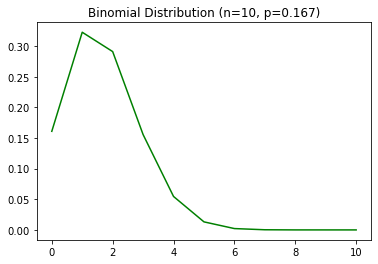

In [6]:
n = 10
p = 0.167
x = np.arange(0, n+1)

dist = binomial_dist(n, p)
plt.plot(x, dist, color='green')
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.show()

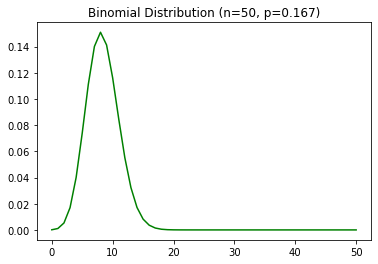

In [7]:
n = 50
p = 0.167
x = np.arange(0, n+1)

dist = binomial_dist(n, p)
plt.plot(x, dist, color='green')
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.show()

## Beta Distribution

[wiki](https://en.wikipedia.org/wiki/Beta_distribution)

Take a set of events (successes and fails), yields the expected priors for an event

In [39]:
def B(a, b):
    out = (math.gamma(a) + math.gamma(b)) / (math.gamma(a + b))
    return out

In [40]:
def PDF(p, a, b):
    '''
    Probability Density Function - relative likelihood that the value of the random variable would 
    be close to that sample
    
    a - number of occurences of an event
    b - number of occurences of alternative
    p - possible of some discrete event 
    '''
    out = ((p**(a-1)) * ((1-p)**(b-1)))/ (B(a, b))
    return out


In [41]:
def beta_dist(a, b, gran = 0.1):
    '''
    Uses set of values to get the PDF distribution
    
    gran - granularity for intervals between probabilities
    '''
    Y = []
    step = int((1/(gran))*1.1)
    space = np.linspace(0, 1, step)
    for i in space:
        y = PDF(i, a, b)
        Y.append(y)
    return Y

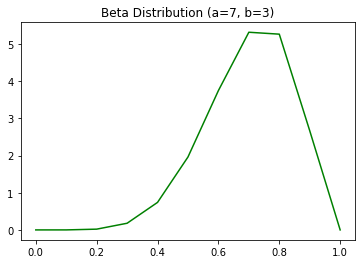

In [100]:
x = np.arange(0, 1.1, step=0.1)
a = 7
b = 3
dist = beta_dist(a, b)

plt.plot(x, dist, color='green')
plt.title(f"Beta Distribution (a={a}, b={b})")
plt.show()

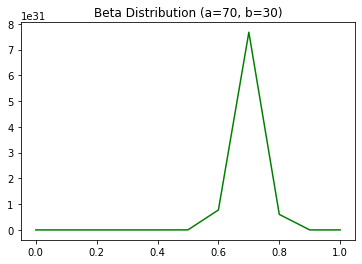

In [51]:
x = np.arange(0, 1.1, step=0.1)
a = 70
b = 30
dist = beta_dist(a, b)

plt.plot(x, dist, color='green')
plt.title(f"Beta Distribution (a={a}, b={b})")
plt.show()

smaller step value between estimations


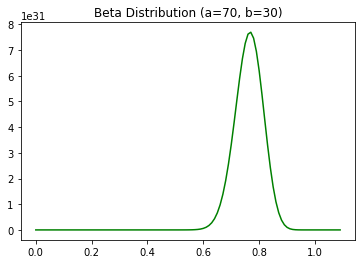

In [60]:
gran = 0.01
x = np.arange(0, 1.1, step=gran)
a = 70
b = 30
dist = beta_dist(a, b, gran)
print("smaller step value between estimations")
plt.plot(x, dist, color='green')
plt.title(f"Beta Distribution (a={a}, b={b})")
plt.show()

In [59]:
##TODO: model init a random binomial distribution (e.g. [0.6, 0.4])
## it then takes a set of trials and estimates a beta distribution for those trials
## it can then adjust its model by assessing the difference

## Bayesian Inference/Estimation

[wiki](https://en.wikipedia.org/wiki/Bayesian_inference)

Take a set of events (successes and fails), update the probability for a hypothesis as more evidence or information becomes available


$x$ - a data point (could be a vector)
<br>
$\theta$ - the parameter (or vector of parameters) of the data point's distribution (i.e. $x\sim p(x\mid \theta ))$
<br>
$\alpha$ - the hyperparameter (or vector of hyperparameters) of the parameter distribution (i.e. $\theta \sim p(\theta \mid \alpha )$)
<br>
$\mathbf {X}$ - the set of n observed data points (i.e., $x_{1},... ,x_{n}$)
<br>
$\tilde {x}$, a new data point whose distribution is to be predicted.
<br>
<br>
[Posterior Distribution:](https://en.wikipedia.org/wiki/Posterior_probability)
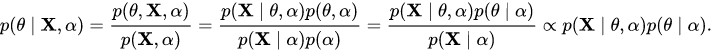
<br>
[Posterior Predictive Distribution:](https://en.wikipedia.org/wiki/Posterior_predictive_distribution)
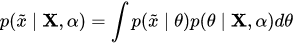
<br>
[Prior Predictive Distribution:](https://en.wikipedia.org/wiki/Posterior_predictive_distribution#Prior_vs._posterior_predictive_distribution)
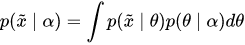
<br>



In [2]:
#b_a = [0.2, 0.8] => e_b = [0.3, 0.7]
#e_A = [0.6, 0.4] => b_B = [0.1. 0.9]
#c_A = |b_A - e_B|

In [8]:
import random
import numpy as np
import scipy.stats as stats
import scipy
import itertools as it
import math
import matplotlib.pyplot as plt

In [166]:
priors = np.linspace(0, 1, 100)
prior = 0.8
prior_estimate = stats.beta.pdf(x = priors, a=2, b=2)
estimate = 0.3
trials = 10

### First attempt

In [167]:
behaviors = []
for t in range(trials):
    behavior = np.random.binomial(1, prior, 1)
    behaviors.append(behavior[0])
    behaviors = behaviors[-10:]
    print("most recent 10 behaviors:", behaviors)
    #if estimate == None:
    #    estimate = behavior
    print("posterior estimate:", estimate)
    r = list(range(5 + 1))
    likelihood = stats.binom.pmf(k = sum(behaviors), n = len(behaviors), p = priors)
    #print("likelihood:", likelihood)
    posterior = likelihood * prior_estimate
    estimate = np.argmax(posterior)*.01
    print("---")


most recent 10 behaviors: [1]
posterior estimate: 0.3
---
most recent 10 behaviors: [1, 1]
posterior estimate: 0.66
---
most recent 10 behaviors: [1, 1, 1]
posterior estimate: 0.74
---
most recent 10 behaviors: [1, 1, 1, 1]
posterior estimate: 0.79
---
most recent 10 behaviors: [1, 1, 1, 1, 1]
posterior estimate: 0.8200000000000001
---
most recent 10 behaviors: [1, 1, 1, 1, 1, 0]
posterior estimate: 0.85
---
most recent 10 behaviors: [1, 1, 1, 1, 1, 0, 1]
posterior estimate: 0.74
---
most recent 10 behaviors: [1, 1, 1, 1, 1, 0, 1, 1]
posterior estimate: 0.77
---
most recent 10 behaviors: [1, 1, 1, 1, 1, 0, 1, 1, 1]
posterior estimate: 0.79
---
most recent 10 behaviors: [1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
posterior estimate: 0.81
---


### Visualizing Bayesian Updating
Pregenerate some values using our prior and add in data at each step.

In [5]:
alpha = beta = 2
theta = 0.2
n = 50
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=n)
print(sum(X_arr) /  X_arr.size)
print(X_arr)

0.2
[0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 1 0 0]


In [6]:
beta_X = np.linspace(0, 1, 1000)
beta_arr = np.asarray([[alpha+sum(X_arr[:i+1]), beta+(i+1-sum(X_arr[:i+1]))] for i in range(X_arr.size)])
beta_arr = np.insert(beta_arr, 0, [alpha, beta], 0)

2 2
3 6
7 17
12 42


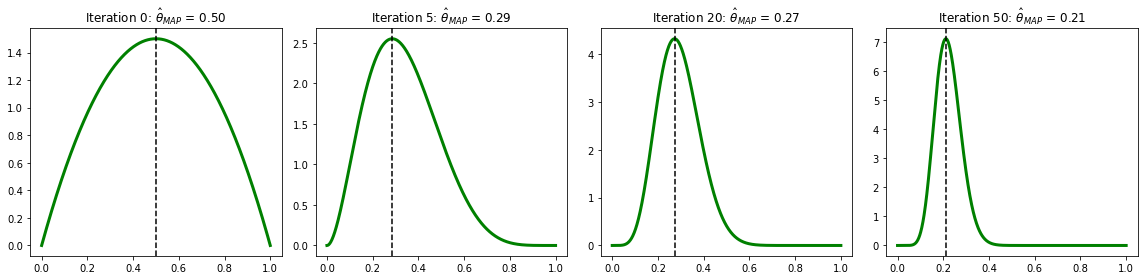

In [9]:
my_color = 'green'
fig, ax_arr = plt.subplots(ncols=4, figsize=(16,4), sharex=True)
for i, iter_ in enumerate([0, 5, 20, 50]):
    ax = ax_arr[i]
    a, b = beta_arr[iter_]
    print(a, b)
    beta_Y = scipy.stats.beta.pdf(x=beta_X, a=a, b=b)
    ax.plot(beta_X, beta_Y, color=my_color, linewidth=3)
    if a > 1 and b > 1:
        mode = (a-1)/(a+b-2)
    else:
        mode = a/(a+b)
    ax.axvline(x=mode, linestyle='--', color='k')
    ax.set_title('Iteration %d: $\hat{\\theta}_{MAP}$ = %.2f'%(iter_, mode))
fig.tight_layout()

### Updating beta distribution as new data is added
At each iteraiton, a new value is generated too help estimate the parameter (prior).

most recent behaviors: [0]
2 3
0.3333333333333333
most recent behaviors: [0, 0]
2 4
0.25
most recent behaviors: [0, 0, 0]
2 5
0.2
most recent behaviors: [0, 0, 0, 1]
3 5
0.3333333333333333
most recent behaviors: [0, 0, 0, 1, 0]
3 6
0.2857142857142857
most recent behaviors: [0, 0, 0, 1, 0, 1]
4 6
0.375
most recent behaviors: [0, 0, 0, 1, 0, 1, 0]
4 7
0.3333333333333333
most recent behaviors: [0, 0, 0, 1, 0, 1, 0, 0]
4 8
0.3
most recent behaviors: [0, 0, 0, 1, 0, 1, 0, 0, 0]
4 9
0.2727272727272727
most recent behaviors: [0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
4 10
0.25


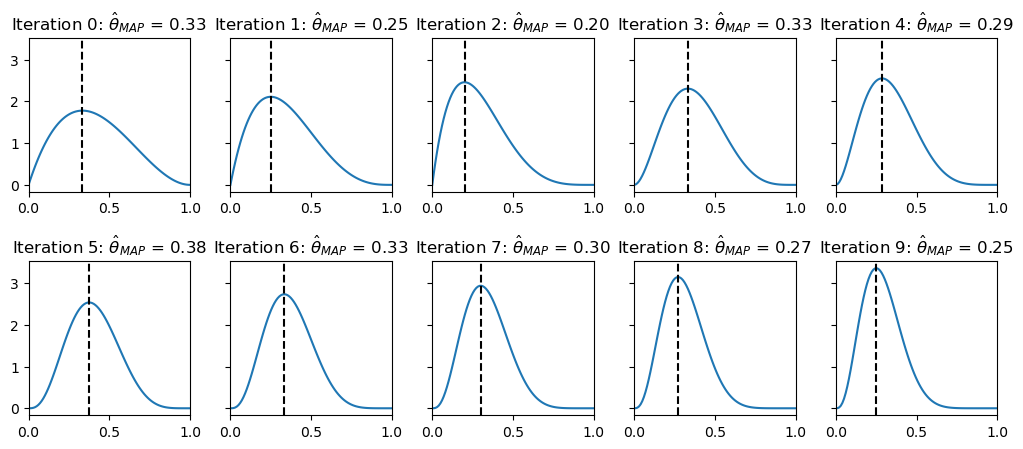

In [34]:
w = 2.5; h = 2.5
ncols = 5
nrows = 2
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)

priors = np.linspace(0, 1, 100)
a = b = 2
prior = 0.2
trials = 10
behaviors = []

for t in range(trials):
    behavior = np.random.binomial(1, prior, 1)
    behaviors.append(behavior[0])
    print("most recent behaviors:", behaviors)
    a = a+behavior[0]
    b = b-behavior[0]+1
    print(a, b)
    dist = scipy.stats.beta.pdf(x=priors, a=a, b=b)
    if a > 1 and b > 1:
        mode = (a-1)/(a+b-2)
    else:
        mode = a/(a+b)
    print(mode)
    
    ai = tups[t]

    # plots
    ax[ai].plot(priors, dist)
    ax[ai].set_xlim(0,1)
    ax[ai].axvline(x=mode, linestyle='--', color='k')
    ax[ai].set_title('Iteration %d: $\hat{\\theta}_{MAP}$ = %.2f'%(t, mode))

alpha: 2, beta: 3
alpha: 3, beta: 7
alpha: 4, beta: 11
alpha: 4, beta: 16
alpha: 5, beta: 20
alpha: 5, beta: 25
alpha: 7, beta: 28
alpha: 7, beta: 33
alpha: 7, beta: 38
alpha: 7, beta: 43
alpha: 8, beta: 47
alpha: 10, beta: 50
alpha: 11, beta: 54
alpha: 12, beta: 58
alpha: 13, beta: 62
alpha: 14, beta: 66


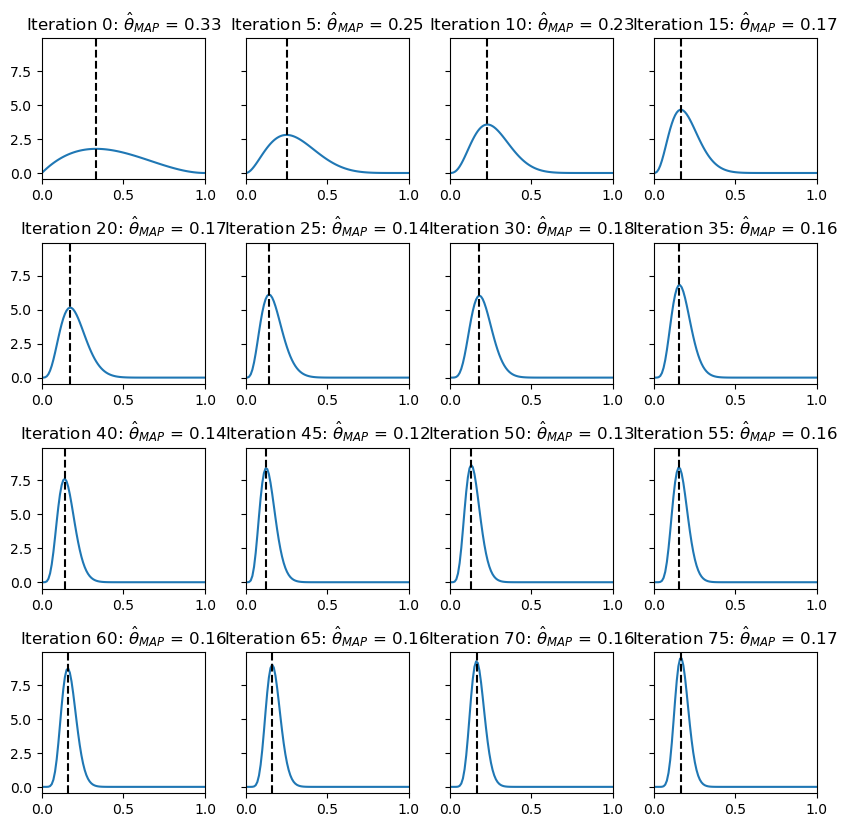

In [48]:
w = 2.5; h = 2.5
ncols = 4
nrows = 4
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)

priors = np.linspace(0, 1, 100)
a = b = 2
prior = 0.2
trials = 76
behaviors = []

for t in range(trials):
    behavior = np.random.binomial(1, prior, 1)
    behaviors.append(behavior[0])
    a = a+behavior[0]
    b = b-behavior[0]+1
    dist = scipy.stats.beta.pdf(x=priors, a=a, b=b)
    if a > 1 and b > 1:
        mode = (a-1)/(a+b-2)
    else:
        mode = a/(a+b)
    if t % 5 == 0:
        #print("\nTRIAL: %d" % (t))
        #print("most recent behaviors:", behaviors)
        print("alpha: %d, beta: %d" % (a, b))
        #print("estimate: %.2f " % (mode))

        ai = tups[t//5]

        # plots
        ax[ai].plot(priors, dist)
        ax[ai].set_xlim(0,1)
        ax[ai].axvline(x=mode, linestyle='--', color='k')
        ax[ai].set_title('Iteration %d: $\hat{\\theta}_{MAP}$ = %.2f'%(t, mode))

### Memory
Idea is to have a moving memory window so we only account for most recent data.

alpha: 2, beta: 3
alpha: 2, beta: 8
alpha: 3, beta: 12
alpha: 4, beta: 11
alpha: 5, beta: 10
alpha: 6, beta: 9
alpha: 6, beta: 9
alpha: 8, beta: 7
alpha: 6, beta: 9
alpha: 3, beta: 12
alpha: 3, beta: 12
alpha: 4, beta: 11
alpha: 6, beta: 9
alpha: 5, beta: 10
alpha: 6, beta: 9
alpha: 4, beta: 11


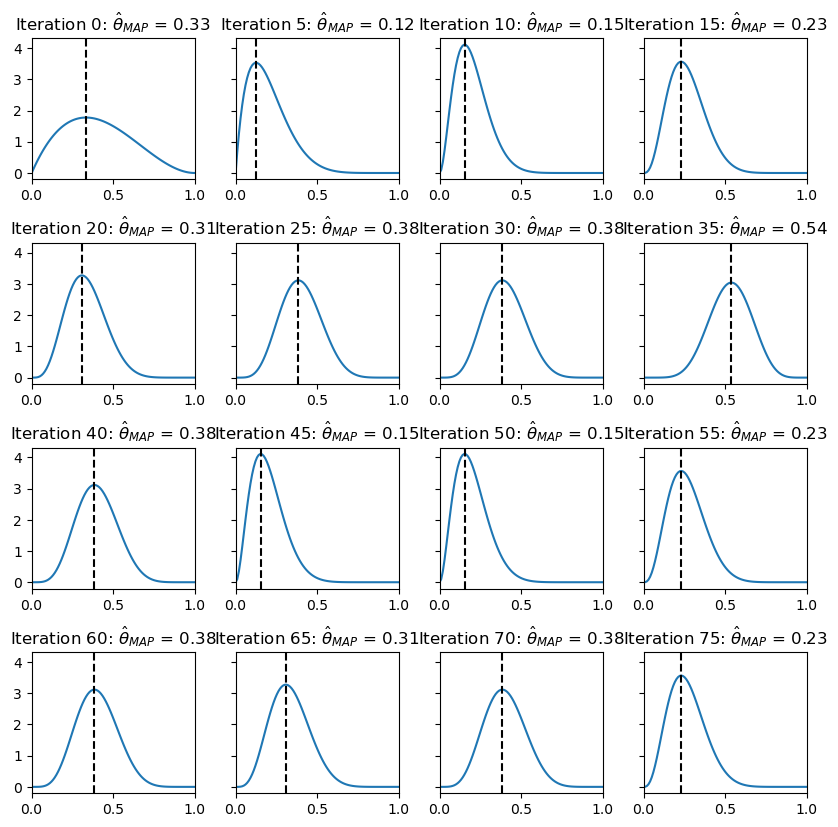

In [170]:
w = 2.5; h = 2.5
ncols = 4
nrows = 4
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)

priors = np.linspace(0, 1, 100)
a = b = 2
prior = 0.2
trials = 76
memory = 12
behaviors = []

for t in range(trials):
    behavior = np.random.binomial(1, prior, 1)
    behaviors.append(behavior[0])
    if len(behaviors) >= memory:
        val = behaviors[0]
        behaviors = behaviors[1:]
        a = a-val
        b = b-1+val
        
    a = a+behavior[0]
    b = b-behavior[0]+1
    dist = scipy.stats.beta.pdf(x=priors, a=a, b=b)
    if a > 1 and b > 1:
        mode = (a-1)/(a+b-2)
    else:
        mode = a/(a+b)
    if t % 5 == 0:
        #print("\nTRIAL: %d" % (t))
        #print("most recent behaviors:", behaviors)
        print("alpha: %d, beta: %d" % (a, b))
        #print("estimate: %.2f " % (mode))

        ai = tups[t//5]

        # plots
        ax[ai].plot(priors, dist)
        ax[ai].set_xlim(0,1)
        ax[ai].axvline(x=mode, linestyle='--', color='k')
        ax[ai].set_title('Iteration %d: $\hat{\\theta}_{MAP}$ = %.2f'%(t, mode))

### Variable memory

When changes in the estimate change beyond a threshold, shrink memory by half to focus on more recent examples, otherwise keep your memory going.

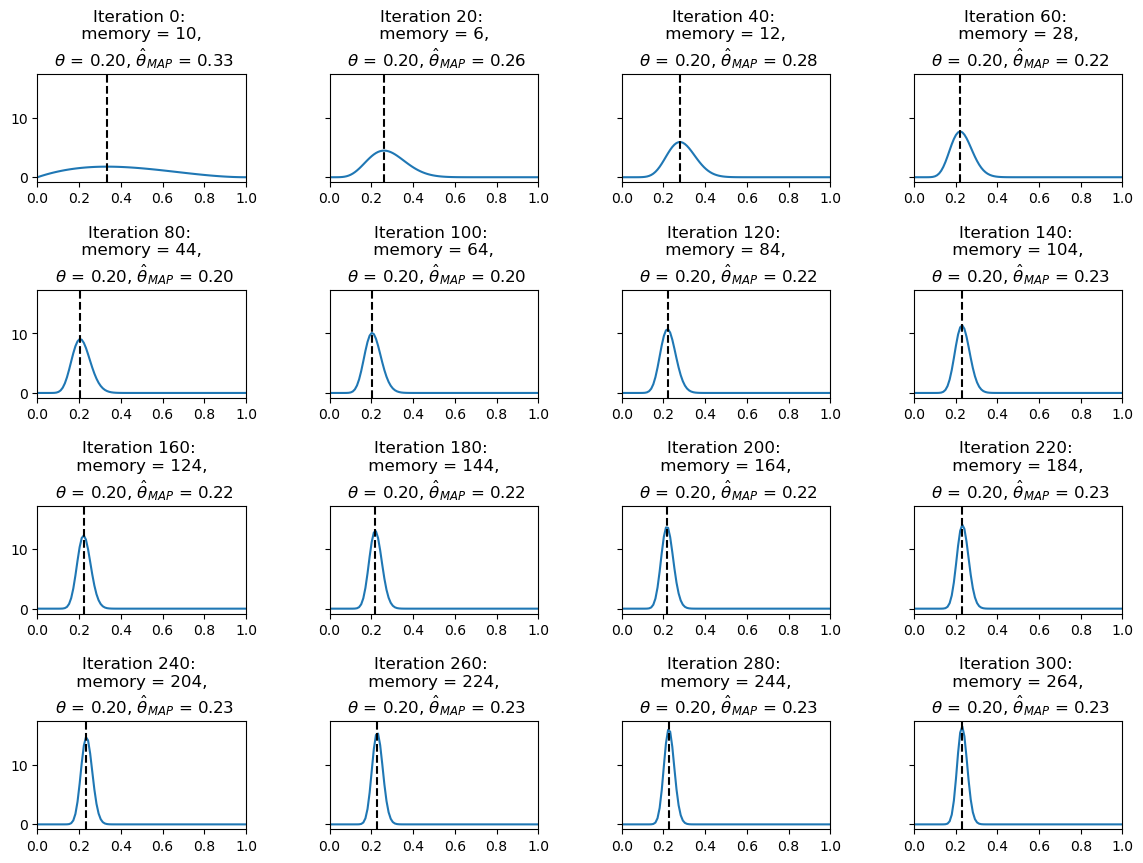

In [165]:
w = 3.5; h = 2.5
ncols = 4
nrows = 4
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.4,hspace=1)

priors = np.linspace(0, 1, 100)
a = b = 2
# target estimate
prior = 0.2
trials = 320
# memory is adjusted, base memory is the minimum memory
memory = 10
min_memory = 5
threshold = 0.01
behaviors = []

for t in range(trials):
    behavior = np.random.binomial(1, prior, 1)
    behaviors.append(behavior[0])
    a = a+behavior[0]
    b = b-behavior[0]+1
    
    if len(behaviors) >= memory:
        tmp = (a-1)/(a+b-2)
        if (abs(tmp-mode) > threshold and memory > min_memory):
            memory -= 1
            #memory = max(int(memory//(1+threshold)), 1)
            behaviors = behaviors[-memory:]
        else:
            memory += 1
            
    dist = scipy.stats.beta.pdf(x=priors, a=a, b=b)
    if a > 1 and b > 1:
        mode = (a-1)/(a+b-2)
    else:
        mode = a/(a+b)
    if t % 20 == 0:
        #print("\nTRIAL: %d" % (t))
        #print("most recent behaviors:", behaviors)
        #print(memory)
        #print("alpha: %d, beta: %d" % (a, b))
        #print("estimate: %.2f " % (mode))

        ai = tups[t//20]

        # plots
        ax[ai].plot(priors, dist)
        ax[ai].set_xlim(0,1)
        ax[ai].axvline(x=mode, linestyle='--', color='k')
        ax[ai].set_title('Iteration %d: \n memory = %d, \n $\\theta$ = %.2f, $\hat{\\theta}_{MAP}$ = %.2f'%(t, memory, prior, mode))
        

### What if the prior changes?

When recent estimates diverge from the running one, reset the memory to the minimum and start over.

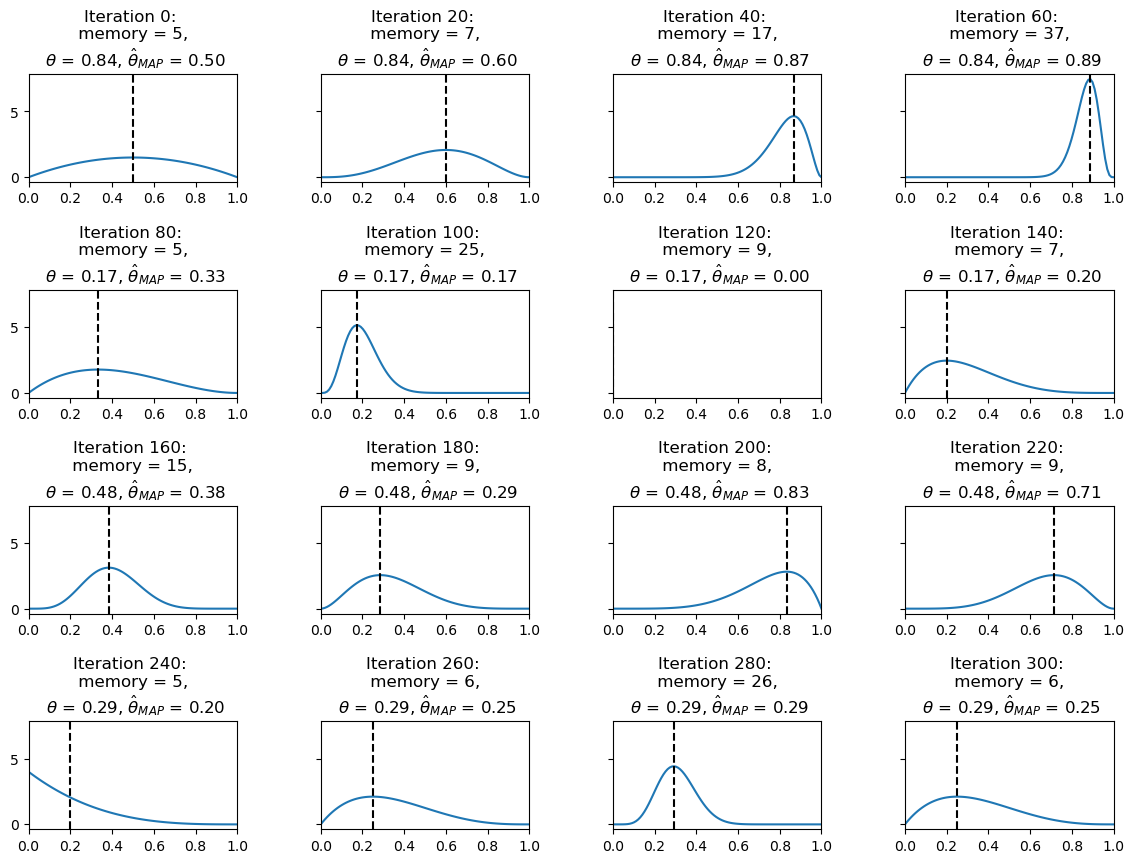

In [2]:
w = 3.5; h = 2.5
ncols = 4
nrows = 4
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.4,hspace=1)

priors = np.linspace(0, 1, 100)
mode = 0
a = b = 2
# target estimate
prior = 0.2
trials = 320
# memory is adjusted, base memory is the minimum memory
memory = min_memory = 5
threshold = 0.2
behaviors = []

for t in range(trials):
    # randomly update prior
    if t % 80 == 0:
        prior = random.random()
    # record behavior
    behavior = np.random.binomial(1, prior, 1)
    behaviors.append(behavior[0])
    
    if len(behaviors) >= memory:
        recent_behaviors = behaviors[-min_memory:]
        new_a = sum(recent_behaviors)
        new_b = len(recent_behaviors) - new_a
        if new_a > 1 and new_b > 1:
            new_mode = (new_a-1)/(new_a+new_b-2)
        else:
            new_mode = new_a/(new_a+new_b)
            
        if abs(new_mode - mode) > threshold:
            # reset memory to be shorter (forget likely useless data)
            memory = min_memory
            behaviors = behaviors[-memory:]
            a = new_a
            b = new_b
        else:
            # get more data
            memory += 1    
            a = a+behavior[0]
            b = b-behavior[0]+1
    
    dist = scipy.stats.beta.pdf(x=priors, a=a, b=b)
    if a > 1 and b > 1:
        mode = (a-1)/(a+b-2)
    else:
        mode = a/(a+b)
    if t % 20 == 0:
        #print("\nTRIAL: %d" % (t))
        #print("most recent behaviors:", behaviors)
        #print(memory)
        #print("alpha: %d, beta: %d" % (a, b))
        #print("estimate: %.2f " % (mode))

        ai = tups[t//20]

        # plots
        ax[ai].plot(priors, dist)
        ax[ai].set_xlim(0,1)
        ax[ai].axvline(x=mode, linestyle='--', color='k')
        ax[ai].set_title('Iteration %d: \n memory = %d, \n $\\theta$ = %.2f, $\hat{\\theta}_{MAP}$ = %.2f'%(t, memory, prior, mode))
        